In this Notebook, we will show why you can't apply a Simple Linear Regression to Stock Pricing for Prediction....

#Part 1: Fitting Linear Regression to TSLA from 2020 to 2021

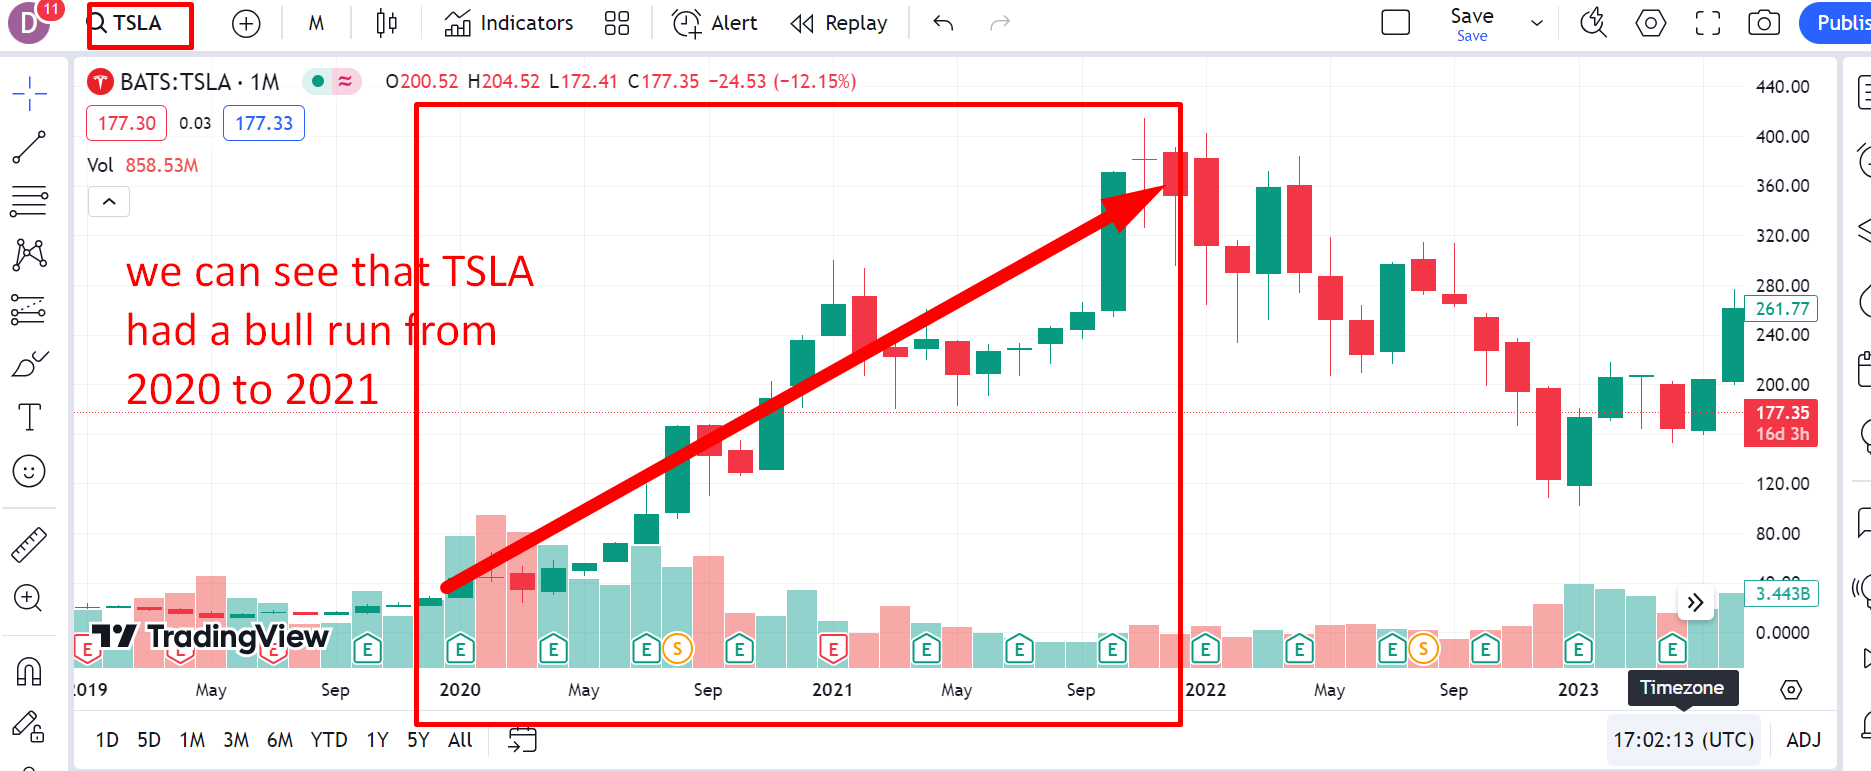

##1a) Extract TSLA Close Price from 2020 to 2021

In [ ]:
#Import Libraries

!pip install yfinance
import yfinance as yf
import pandas as pd

In [ ]:
#Import Data from 2020 to 2021

ticker = 'TSLA'
df = yf.download(\
                 ticker,
                 start = '2020-01-01',
                 end = '2021-12-31')

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2021-12-23,335.600006,357.660004,332.519989,355.666656,355.666656,92713200
2021-12-27,357.890015,372.333344,356.906677,364.646667,364.646667,71145900
2021-12-28,369.829987,373.000000,359.473328,362.823334,362.823334,60324000


In [ ]:
#Change the Dates to Day Number

df = df.reset_index()
df = df.reset_index()

df = df.rename(\
               columns = {'index': 'Day'})
df

,Day,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
1,1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2,2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
3,3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
4,4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...,...,...
499,499,2021-12-23,335.600006,357.660004,332.519989,355.666656,355.666656,92713200
500,500,2021-12-27,357.890015,372.333344,356.906677,364.646667,364.646667,71145900
501,501,2021-12-28,369.829987,373.000000,359.473328,362.823334,362.823334,60324000
502,502,2021-12-29,366.213318,368.000000,354.713318,362.063324,362.063324,56154000


In [ ]:
#creating a New Dataframe out of Day and Close Price

data = {'Day': df.Day,
        'Close': df.Close
        }

new_df = pd.DataFrame(data)
new_df

,Day,Close
0,0,28.684000
1,1,29.534000
2,2,30.102667
3,3,31.270666
4,4,32.809334
...,...,...
499,499,355.666656
500,500,364.646667
501,501,362.823334
502,502,362.063324


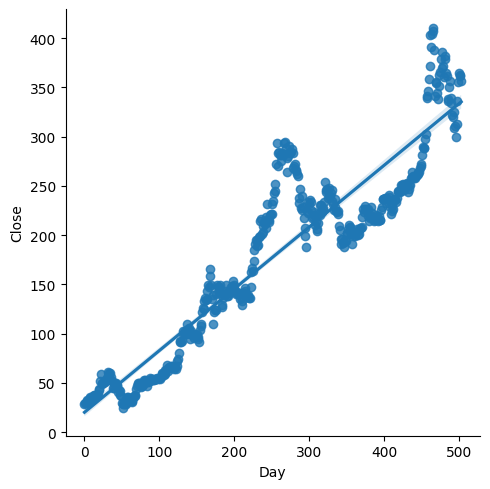

In [ ]:
#plotting to show the Bull Run from 2020 to 2021....

import seaborn as sns

sns.lmplot(\
           x = 'Day',
           y = 'Close',
           data = new_df)



---



##1b) Linear Regression Prediction for day 666 on TSLA

In [ ]:
#import Linear Regression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [ ]:
#Reshape X and y to fit into the Linear Regression Model...
X = new_df.Day.values.reshape(-1,1)
y = new_df.Close.values.reshape(-1,1)

In [ ]:
#Checking out the Coefficient and Y-intercept....

lm.fit(X,y)

print(lm.coef_)
print(lm.intercept_)

# the Linear Equation is
# Close Price = 0.63(Day) + 20.2

[[0.62670303]]
[20.20898242]


In [ ]:
a = [[666]]

In [ ]:
#trying to predict a random Day 666....
Predicted_Price_Day666 = lm.predict(a)
Predicted_Price_Day666

#Day 503 is the last day for the period 2020 ~ 2021
#Day 666 is a randomn day in year 2022
#The predicted price rose to $437!!!

array([[437.59319833]])



---



#Part 2: Checking out TSLA Performance in 2022...

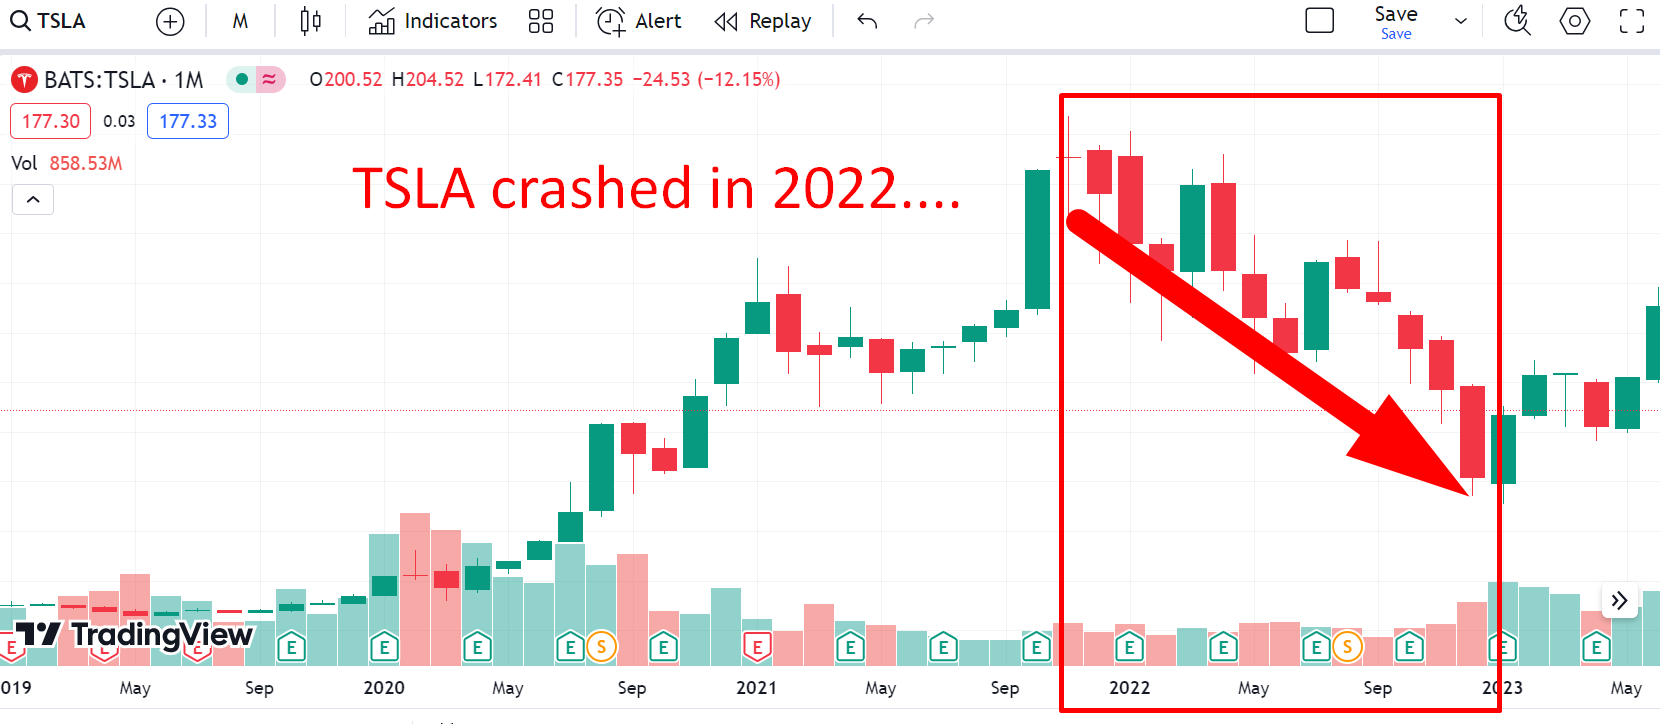

##2a) Extract TSLA Close price for 2022

In [ ]:
ticker = 'TSLA'

stock2022 = yf.download(\
                 ticker,
                 start = '2022-01-01',
                 end = '2022-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
stock2022 = stock2022.reset_index()
stock2022 = stock2022.reset_index()
stock2022

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400
1,1,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300
2,2,2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800
3,3,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600
4,4,2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700
...,...,...,...,...,...,...,...,...
246,246,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
247,247,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
248,248,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
249,249,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300


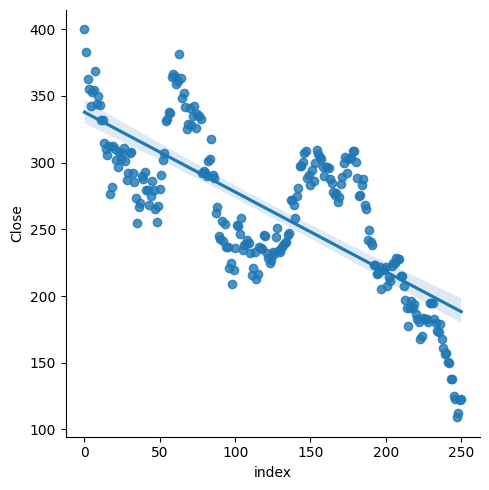

In [ ]:
sns.lmplot(\
           x = 'index',
           y = 'Close',
           data = stock2022)

In [ ]:
#Our chose Day is (666 - 503 = 163) in the year 2022...

stock2022.iloc[163].Close

#the actual price fell to $288!
#that's a far cry from our predicted $437 using our LM model!!!

288.0899963378906



---



#Part 3: Conclusion

- we cannot blindly use Linear Regression to predict Stock Prices.

- but more than that, Autocorrelation makes LR unsuitable for forecasting Time Series Data

- Time Series Data HAS Autocorrelation

- Autocorrelation means that the variable is related back to itself, which voids the assumption of LR.



---



#THE END

---

